In [1]:
os <- read.csv('11th_nov_signal.dat',quote='#')
ob <- read.csv('16th_nov_background.dat',quote='#')
ns <- read.csv('signal_long.dat', quote='#')
nb <- read.csv('background_long_23nov.dat', quote='#')
sls <- list(os, ns)
ols <- list(ob, nb)

In [33]:
library(scales)
library(ggplot2)
theme_get()

List of 93
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

In [3]:
names(os)[1] <- 'timer'
names(ob)[1] <- 'timer'
names(ns)[1] <- 'timer'
names(nb)[1] <- 'timer'

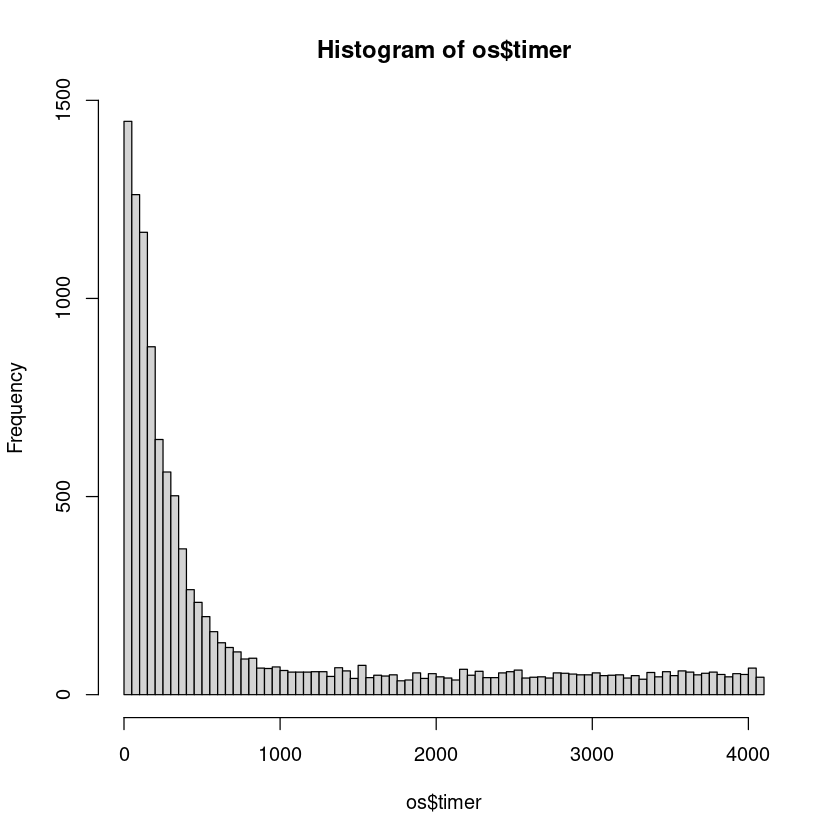

[1]   25   75  125  175  225  275  325  375  425  475  525  575  625  675  725
[16]  775  825  875  925  975 1025 1075 1125 1175 1225 1275 1325 1375 1425 1475
[31] 1525 1575 1625 1675 1725 1775 1825 1875 1925 1975 2025 2075 2125 2175 2225
[46] 2275 2325 2375 2425 2475 2525 2575 2625 2675 2725 2775 2825 2875 2925 2975
[61] 3025 3075 3125 3175 3225 3275 3325 3375 3425 3475 3525 3575 3625 3675 3725
[76] 3775 3825 3875 3925 3975 4025 4075

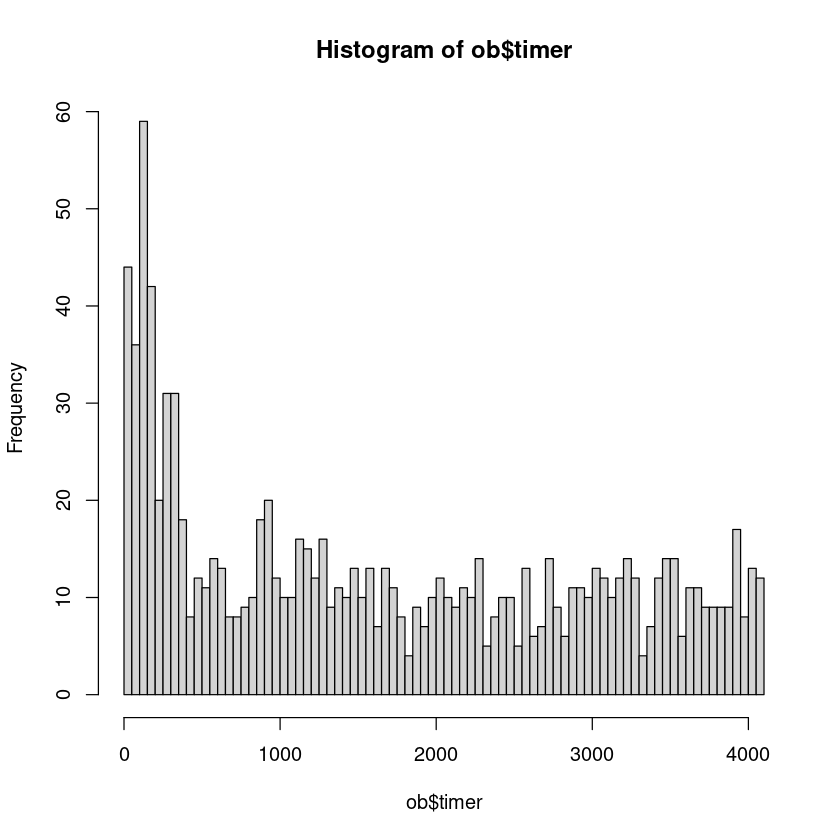

In [4]:
osh <- hist(os$timer, breaks=100)
obh <- hist(ob$timer, breaks=100)
obh$mids

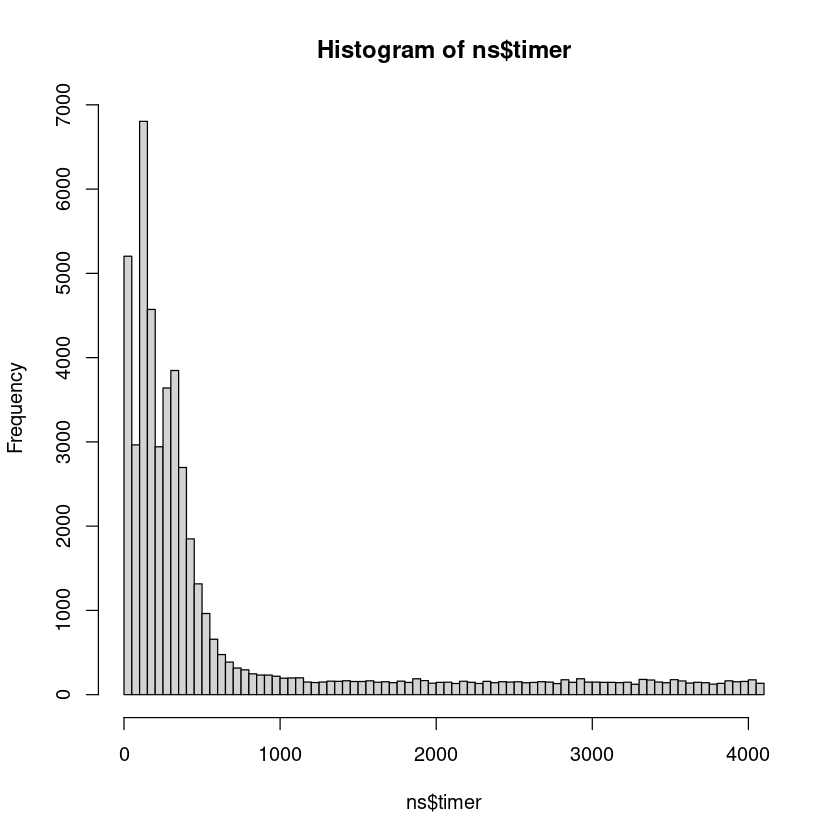

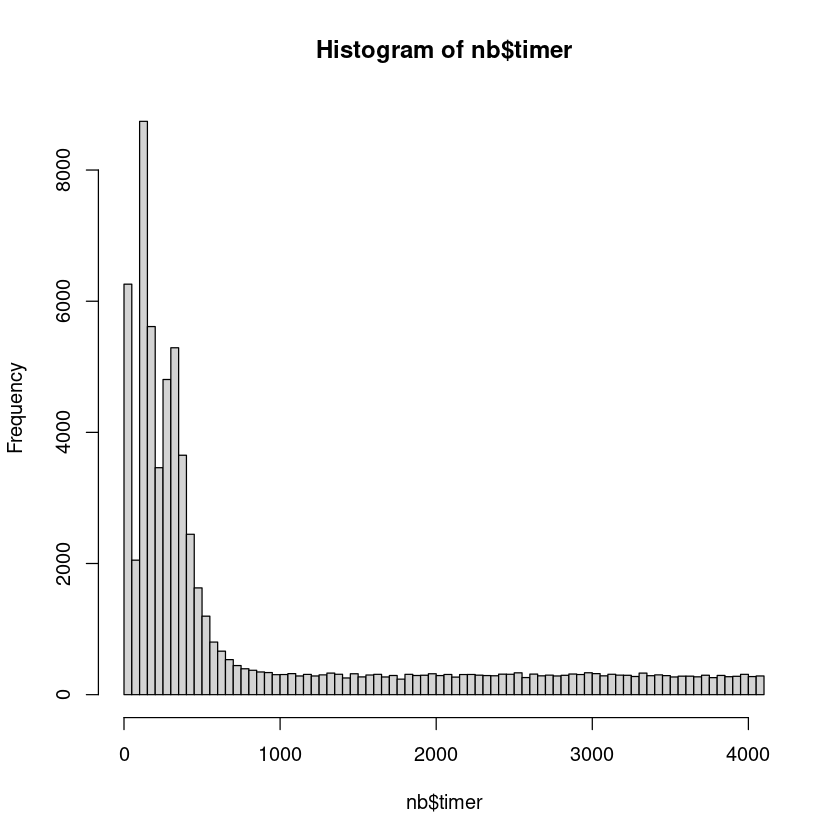

In [5]:
nsh <- hist(ns$timer, breaks=100)
nbh <- hist(nb$timer, breaks=100)

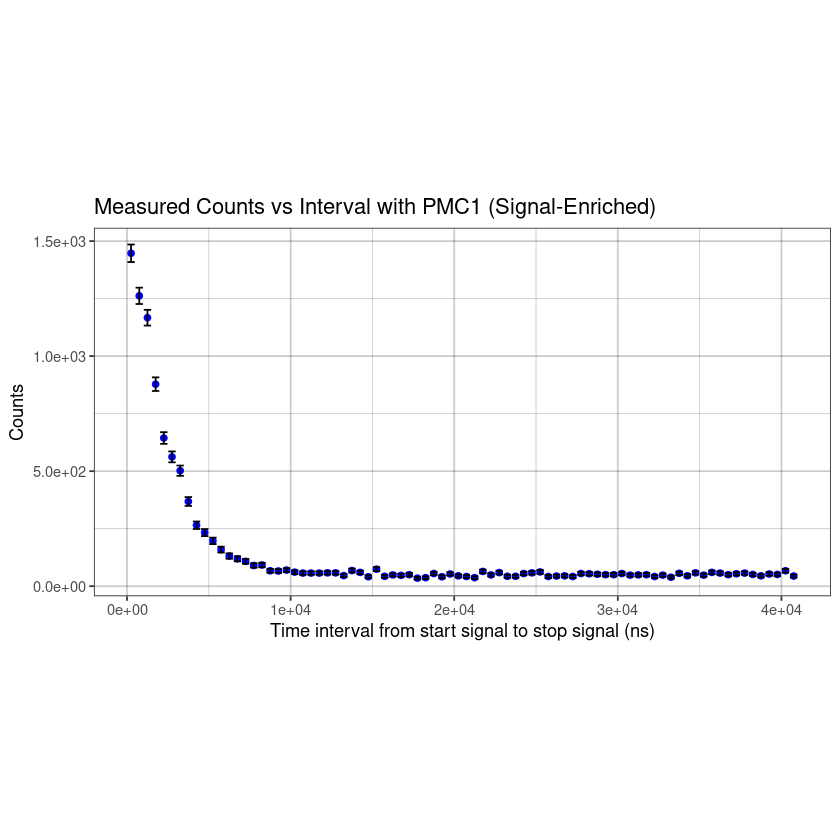

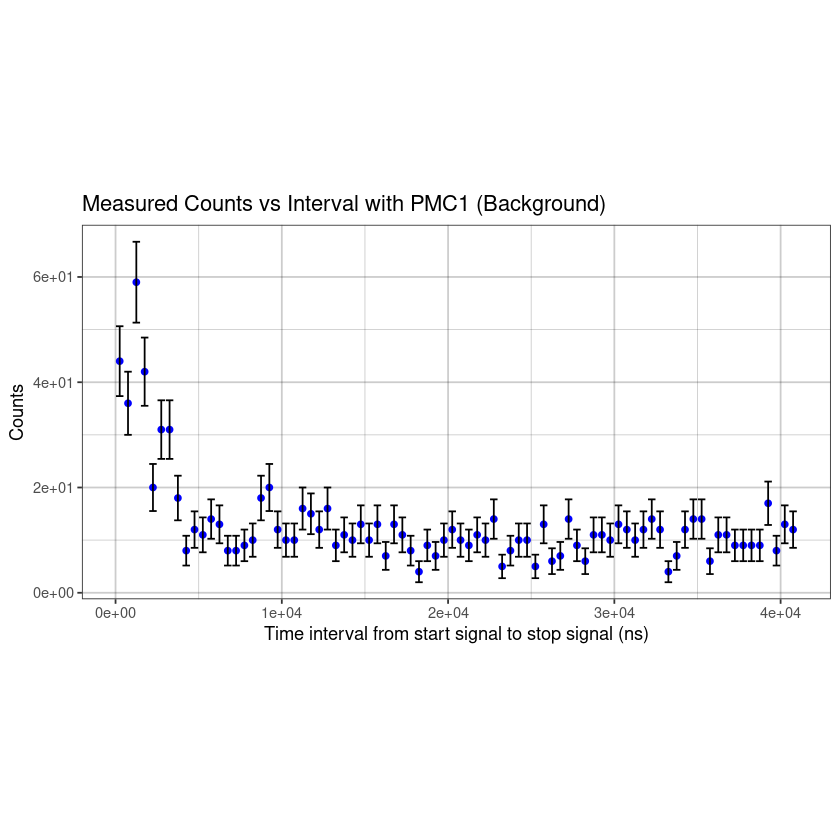

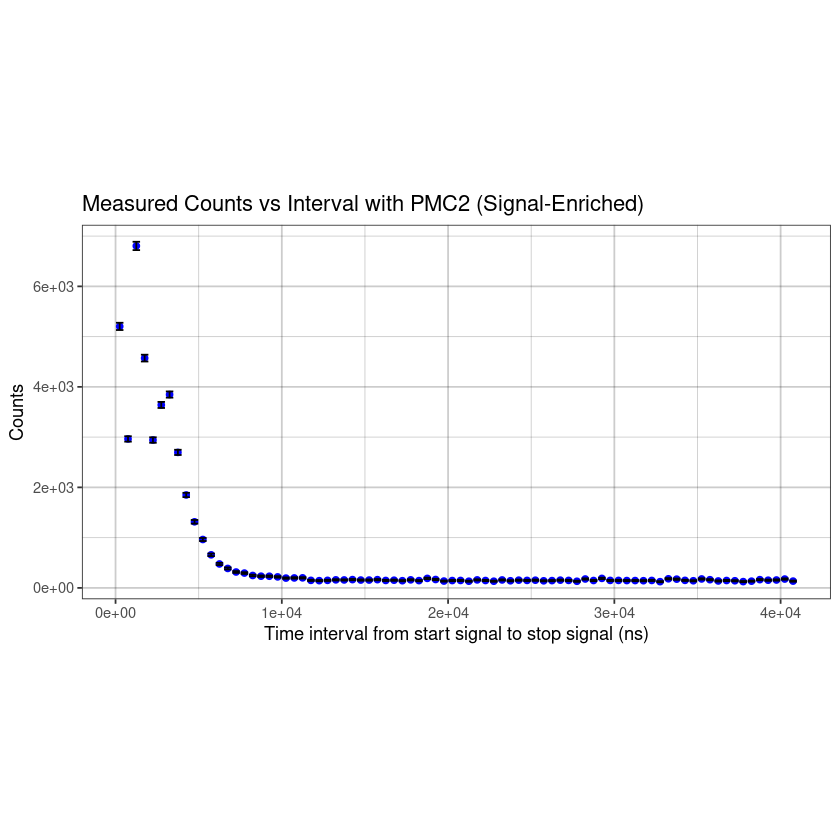

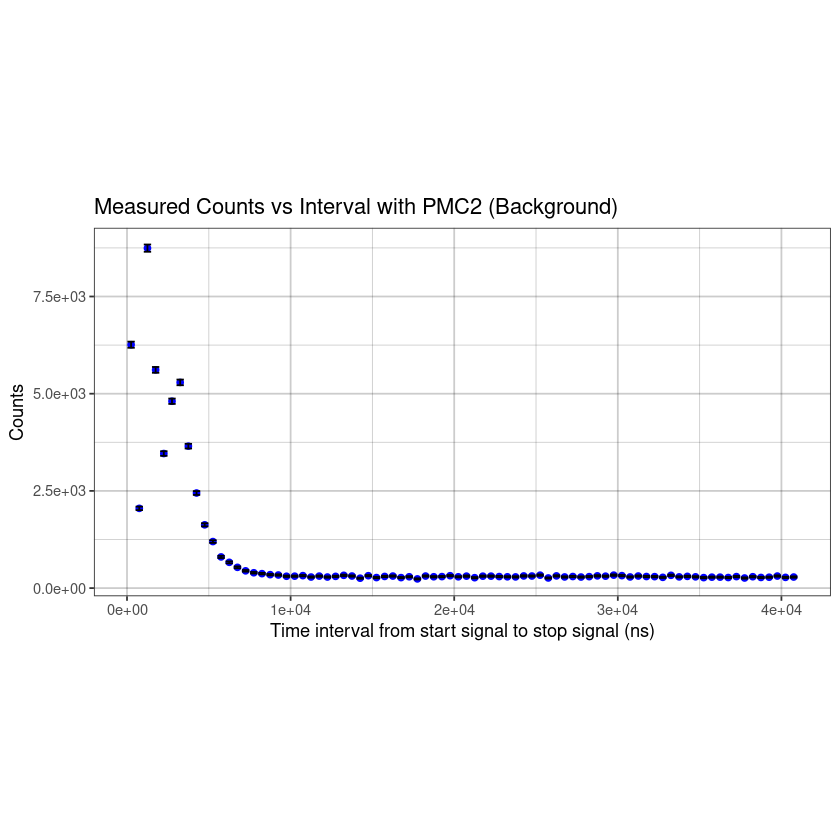

In [50]:
odf <- data.frame(x=osh$mids*10, y=osh$counts, ysd=sqrt(osh$counts))
ndf <- data.frame(x=nsh$mids*10, y=nsh$counts, ysd=sqrt(nsh$counts))
obdf <- data.frame(x=obh$mids*10, y=obh$counts, ysd=sqrt(obh$counts))
nbdf <- data.frame(x=nbh$mids*10, y=nbh$counts, ysd =sqrt(nbh$counts))
fdf_plot <- function(df) {
    pl <- ggplot(df,aes(x=x, y=y))
    pl <- pl + geom_point(col='blue')
    pl <- pl + geom_errorbar(aes(ymin=y-ysd,ymax=y+ysd))
    pl <- pl + scale_x_continuous(labels=scales::scientific) + scale_y_continuous(labels=scales::scientific)
    pl <- pl + theme_bw() + theme(aspect.ratio = 0.5, panel.grid = element_line(color=rgb(0,0,0,0.2)))
    pl <- pl + labs(x="Time interval from start signal to stop signal (ns)", y="Counts")
    return(pl)
}
pls <- lapply(list(odf,ndf,obdf,nbdf),fdf_plot)
names(pls) <- c("odf", "ndf", "obdf", "nbdf")
pls$odf + labs(title="Measured Counts vs Interval with PMC1 (Signal-Enriched)")
ggsave("odf.pdf",width=10, height=5)
pls$obdf + labs(title="Measured Counts vs Interval with PMC1 (Background)")
ggsave("obdf.pdf", width=10, height=5)
pls$ndf + labs(title="Measured Counts vs Interval with PMC2 (Signal-Enriched)")
ggsave("ndf.pdf", width=10, height=5)
pls$nbdf + labs(title="Measured Counts vs Interval with PMC2 (Background)")
ggsave("nbdf.pdf", width=10, height=5)

In [249]:
ost <- os[nrow(os),c('total.starts')]
obt <- ob[nrow(ob),c('total.starts')]
nst <- ns[nrow(ns), c('total.starts')]
nbt <- nb[nrow(nb), c('total.starts')]
lapply(list(ns,nb,os,ob),tail)
format(639054, scientific=TRUE)

,timer,starts,total.starts,total.stops
,<int>,<int>,<int>,<int>
49410,3565,99,4083296,49410
49411,1226,29,4083325,49411
49412,639,17,4083342,49412
49413,244,59,4083401,49413
49414,105,4,4083405,49414
49415,178,5,4083410,49415
,timer,starts,total.starts,total.stops
,<int>,<int>,<int>,<int>
67649,175,499,7692518,67649


[1] "6.39054e+05"

In [255]:
639054/1067
2751609/11592
7693012/67654
4083410/49415
599/237
114/83
summary(ofit)

[1] 598.926

[1] 237.3714

[1] 113.7111

[1] 82.63503

[1] 2.527426

[1] 1.373494


Formula: y ~ SSasymp(x, yf, y0, log_alpha)

Parameters:
           Estimate Std. Error  t value Pr(>|t|)    
yf           7.3012     1.8413    3.965  0.00016 ***
y0        1504.8187    38.6498   38.935  < 2e-16 ***
log_alpha   -7.6970     0.0251 -306.689  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9593 on 79 degrees of freedom

Number of iterations to convergence: 4 
Achieved convergence tolerance: 6.704e-06


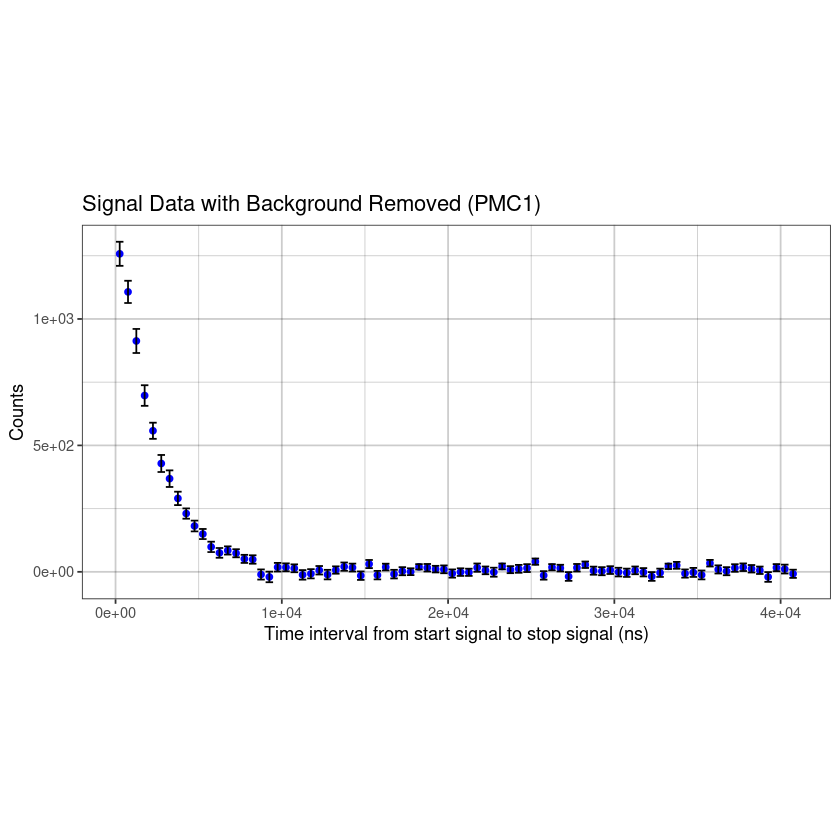

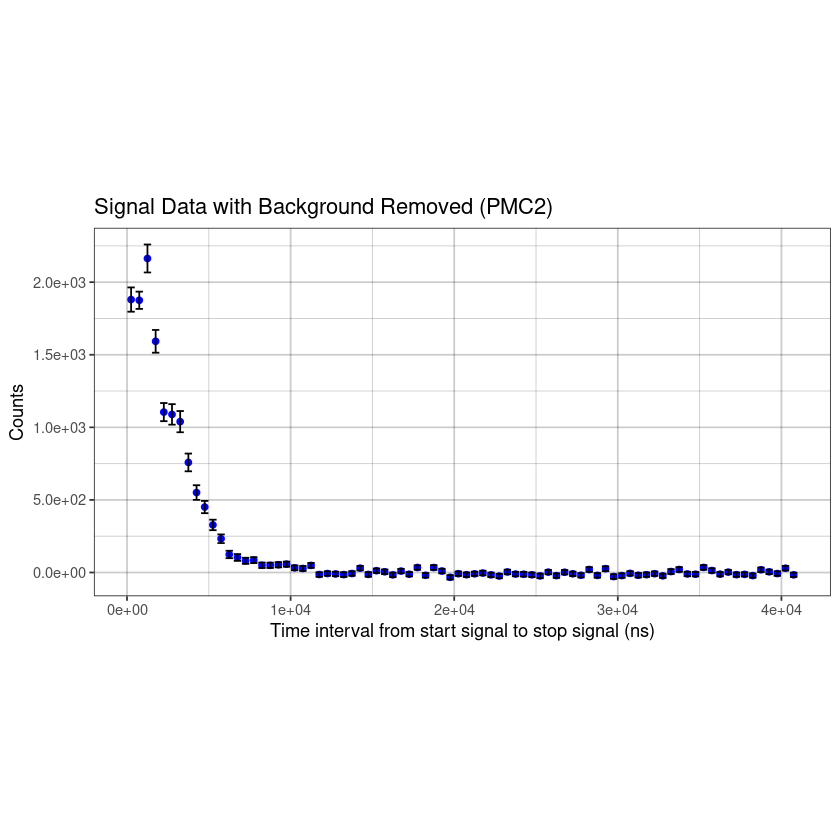

In [54]:
#signal dataset is backgr + signal, backgr dataset is just backgr
#so generally fewer starts per stop in signal dataset
#errors add in quadrature
#so have to adjust for that

odfa <- data.frame(x=odf$x, y=odf$y - obdf$y*(ost/obt), ysd=sqrt(((ost/obt)*obdf$ysd)**2 + odf$ysd**2))
ndfa <- data.frame(x=ndf$x, y=ndf$y - nbdf$y*(nst/nbt), ysd=sqrt(((nst/nbt)*nbdf$ysd)**2 + ndf$ysd**2))
fdf_plot(odfa) + labs(title="Signal Data with Background Removed (PMC1)")
ggsave("odfa.pdf",width=10,height=5)
fdf_plot(ndfa) + labs(title="Signal Data with Background Removed (PMC2)")
ggsave("ndfa.pdf", width=10, height=5)

In [602]:
#drop rows with < 1 counts
#good practice wrt chisq?
#odfa <- odfa[odfa$y>1,]
#ndfa <- ndfa[ndfa$y>1,]

In [55]:
#now fit an exponential to this
ofit <- nls(y ~ SSasymp(x, yf, y0, log_alpha), data = odfa, weights=1/(odfa$ysd**2))
nfit <- nls(y ~ SSasymp(x, yf, y0, log_alpha), data = ndfa, weights=1/ndfa$ysd**2)
ofit
nfit


Nonlinear regression model
  model: y ~ SSasymp(x, yf, y0, log_alpha)
   data: odfa
       yf        y0 log_alpha 
    7.301  1504.819    -7.697 
 weighted residual sum-of-squares: 72.7

Number of iterations to convergence: 4 
Achieved convergence tolerance: 6.704e-06

Nonlinear regression model
  model: y ~ SSasymp(x, yf, y0, log_alpha)
   data: ndfa
       yf        y0 log_alpha 
   -8.295  2641.877    -7.820 
 weighted residual sum-of-squares: 243.7

Number of iterations to convergence: 5 
Achieved convergence tolerance: 5.049e-06

In [112]:
library(minpack.lm)
expfit <- nlsLM(y ~ (y0-yf)*(0.56*exp(-a*x) + 0.44*exp(-0.000588*x)) + yf, data = ndfa, start=list(y0=1500,yf=70,a=0.00044), weights=1/ndfa$ysd**2)

In [116]:
1/1700
exp(coef(ofit)["log_alpha"])
log(0.56)

[1] 0.0005882353

log_alpha 
0.0004541645

[1] -0.5798185

In [117]:
exp(coef(nfit)["log_alpha"])

log_alpha 
0.0004016533

In [118]:
expfit
1/3.485

Nonlinear regression model
  model: y ~ (y0 - yf) * (0.56 * exp(-a * x) + 0.44 * exp(-0.000588 *     x)) + yf
   data: ndfa
        y0         yf          a 
 2.766e+03 -8.696e+00  3.485e-04 
 weighted residual sum-of-squares: 277.1

Number of iterations to convergence: 4 
Achieved convergence tolerance: 1.49e-08

[1] 0.286944

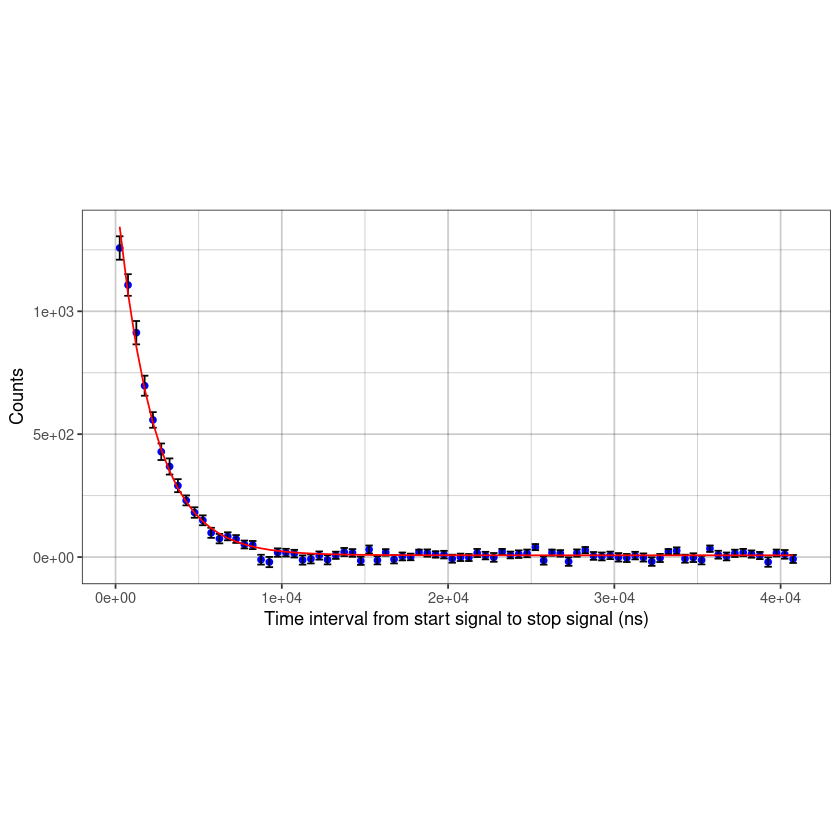

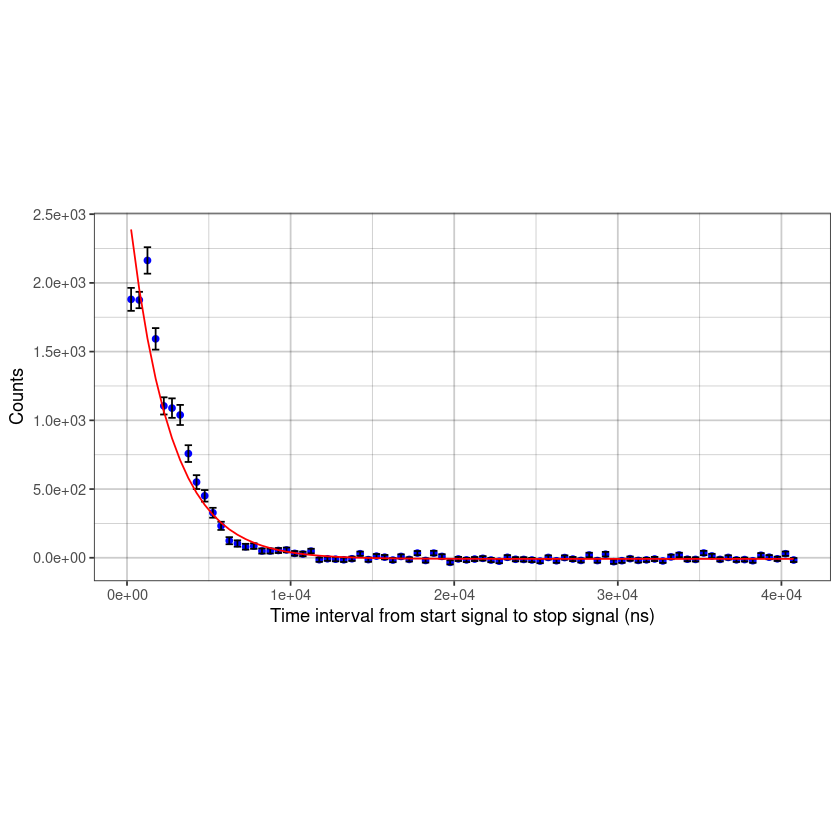

In [119]:
fdf_plot(odfa) + geom_line(aes(x=x, y=predict(ofit)), col='red')
fdf_plot(ndfa) + geom_line(aes(x=x, y=predict(nfit)), col='red')

[1] 82

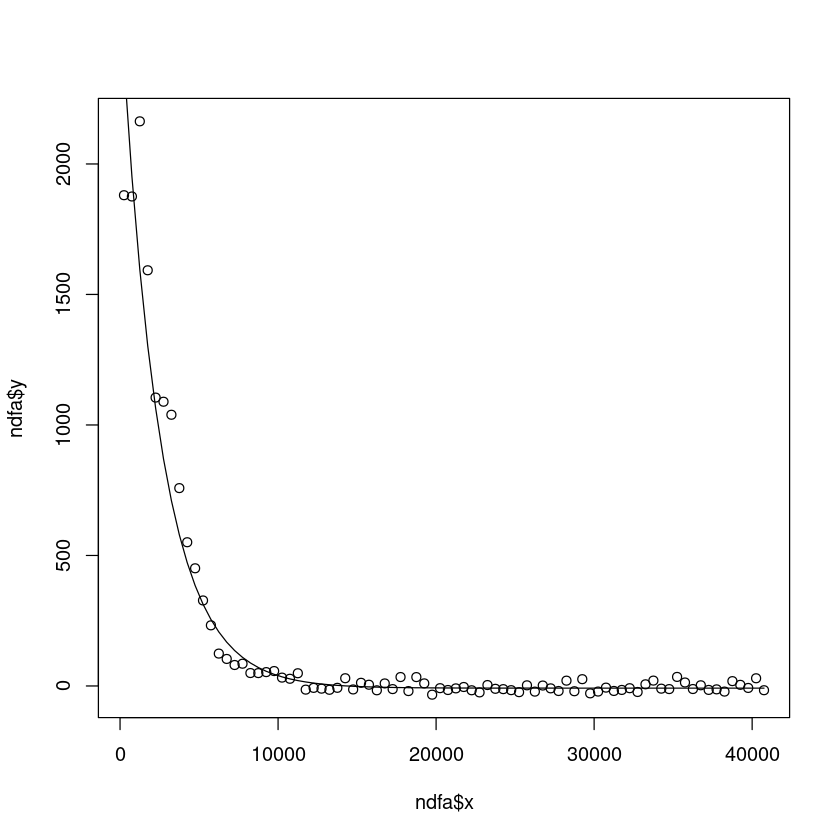

In [120]:
plot(ndfa$x, ndfa$y)
lines(ndfa$x, predict(nfit))
nrow(ndfa)

In [121]:
summary(ofit)


Formula: y ~ SSasymp(x, yf, y0, log_alpha)

Parameters:
           Estimate Std. Error  t value Pr(>|t|)    
yf           7.3012     1.8413    3.965  0.00016 ***
y0        1504.8187    38.6498   38.935  < 2e-16 ***
log_alpha   -7.6970     0.0251 -306.689  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9593 on 79 degrees of freedom

Number of iterations to convergence: 4 
Achieved convergence tolerance: 6.704e-06


In [265]:
#error of alpha
std_err_log <- function(la,las) exp(la)*las
std_alpha <- c(std_err_log(coef(ofit)["log_alpha"], sqrt(vcov(ofit)["log_alpha","log_alpha"])),std_err_log(coef(nfit)["log_alpha"],  sqrt(vcov(nfit)["log_alpha","log_alpha"])))
names(std_alpha) <- c('oastd','nastd')
std_alpha
oapr <- exp(coef(ofit)["log_alpha"])
std_alpha[1]/exp(coef(ofit)["log_alpha"])**2
1/exp(coef(ofit)["log_alpha"])
format(oapr,scientific=TRUE)
#so propagating uncertainty through exponents is pretty shabby

oastd        nastd 
1.139828e-05 1.395319e-05

oastd 
55.26024

log_alpha 
 2201.845

log_alpha 
"4.541645e-04"

In [123]:
vcov(ofit)
vcov(ofit)["log_alpha","log_alpha"]

,yf,y0,log_alpha
yf,3.39021732,8.6779346,0.0141231351
y0,8.67793460,1493.8040551,0.7013336208
log_alpha,0.01412314,0.7013336,0.0006298715


[1] 0.0006298715

In [124]:
library(ggplot2)

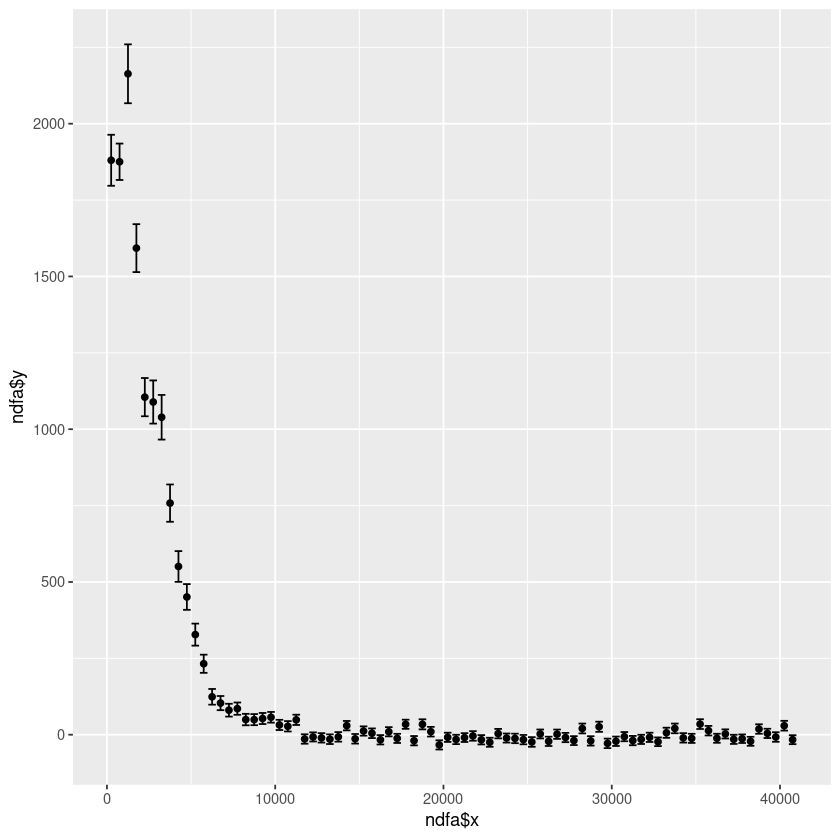

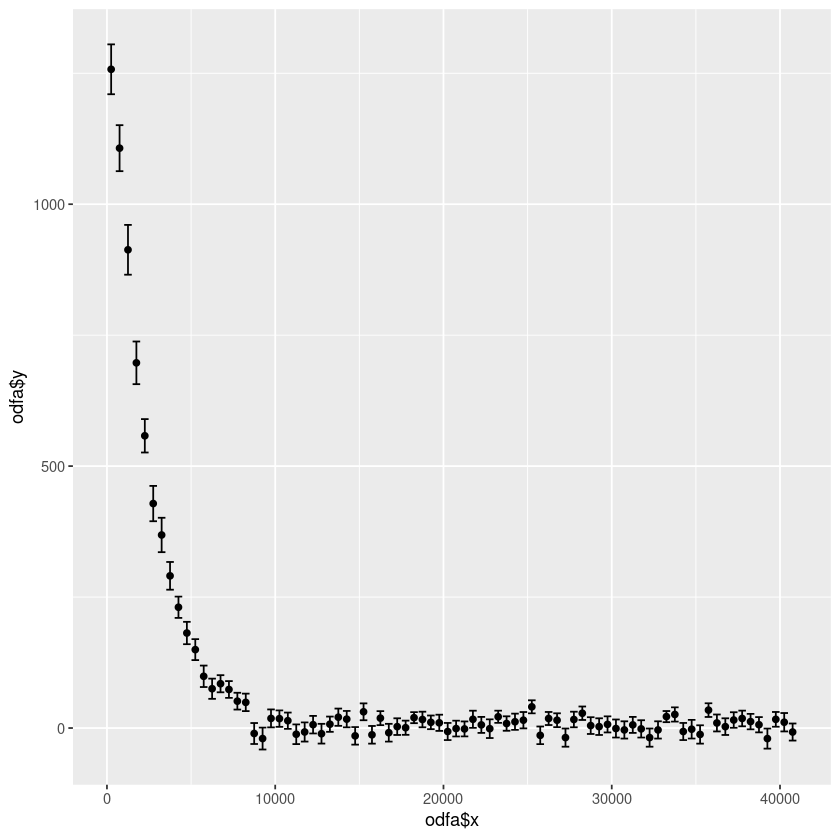

In [125]:
p <- qplot(x=ndfa$x, y=ndfa$y)
p <- p + geom_errorbar(aes(ymin = ndfa$y-ndfa$ysd, ymax=ndfa$y+ndfa$ysd))
p2 <- qplot(x=odfa$x, y=odfa$y)
p2 <- p2 + geom_errorbar(aes(ymin = odfa$y-odfa$ysd, ymax=odfa$y+odfa$ysd))
p
p2

In [126]:

1/exp(confint(ofit,"log_alpha"))

Waiting for profiling to be done...



2.5%    97.5% 
2310.148 2098.220

In [127]:
SSasymp(c(0,12,4,5),1,233,0.0005)

[1] 233.000000   1.001417   5.240736   2.559300

In [128]:
erfSSasymp <- function(fit, xv) {
    v1 <- SSasymp(xv, Asym=confint.default(fit, "yf")[1], R0=confint.default(fit,"y0")[1], lrc=confint.default(fit,"log_alpha")[1])
    v2 <- SSasymp(xv, Asym=confint.default(fit, "yf")[2], R0=confint.default(fit,"y0")[2], lrc=confint.default(fit,"log_alpha")[2])
    return(data.frame(x=xv,yl=v1,yh=v2))
}

In [222]:
stderfSSasymp <- function(fit, xv){
    errpropfn <- function(l,m,n,z,dl,dm,dn,dz) sqrt((dl*(exp(-n * z)))^2+(dm*(1 - exp(-n * z)))^2+(dn*(-((l - m) * (exp(-n * z) * z))))^2+(dz*(-((l - m) * (exp(-n * z) * n))))^2)
    std_alpha <- std_err_log(coef(fit)["log_alpha"], sqrt(vcov(fit)["log_alpha","log_alpha"]))
    std_y0 <- sqrt(vcov(fit)["y0","y0"])
    std_yf <- sqrt(vcov(fit)["yf", "yf"])
    y0 <- coef(fit)
    pred <- predict(fit, newdata=data.frame(x=xv))
    sdv <- errpropfn(coef(fit)['y0'], coef(fit)['yf'], exp(coef(fit)['log_alpha']),0,std_y0, std_yf, std_alpha, 0)
    v1 <- pred - sdv
    v2 <- pred + sdv
    return(data.frame(x=xv,yl=v1,yh=v2,y=predict(fit,newdata=data.frame(x=xv))))
    }
head(stderfSSasymp(ofit, seq(0,40000)))

,x,yl,yh,y
,<int>,<dbl>,<dbl>,<dbl>
1,0,1466.169,1543.468,1504.819
2,1,1465.489,1542.788,1504.139
3,2,1464.809,1542.109,1503.459
4,3,1464.130,1541.429,1502.780
5,4,1463.451,1540.750,1502.101
6,5,1462.772,1540.072,1501.422


In [159]:
coef(ofit)['yf']

yf 
7.301252

In [149]:
f = z ~ (l-m)*exp(-n*z) + m

lapply(all.vars(f[[3]]), function(v) D(f[[3]], v))
lapply(all.vars(f[[3]]), function(v) deparse(D(f[[3]], v)))
       
sprintf('sqrt(%s)', 
    paste(
        sapply(all.vars(f[[3]]), function(v) {
            sprintf('(d%s*(%s))^2', v, deparse(D(f[[3]], v)))
        }), 
        collapse='+'
    )
)


[[1]]
exp(-n * z)

[[2]]
1 - exp(-n * z)

[[3]]
-((l - m) * (exp(-n * z) * z))

[[4]]
-((l - m) * (exp(-n * z) * n))


[[1]]
[1] "exp(-n * z)"

[[2]]
[1] "1 - exp(-n * z)"

[[3]]
[1] "-((l - m) * (exp(-n * z) * z))"

[[4]]
[1] "-((l - m) * (exp(-n * z) * n))"

[1] "sqrt((dl*(exp(-n * z)))^2+(dm*(1 - exp(-n * z)))^2+(dn*(-((l - m) * (exp(-n * z) * z))))^2+(dz*(-((l - m) * (exp(-n * z) * n))))^2)"

In [163]:
f = z ~ exp(n)
all.vars(f[[3]])
lapply(all.vars(f[[3]]), function(v) D(f[[3]], v))
lapply(all.vars(f[[3]]), function(v) deparse(D(f[[3]], v)))
       
sprintf('sqrt(%s)', 
    paste(
        sapply(all.vars(f[[3]]), function(v) {
            sprintf('(d%s*(%s))^2', v, deparse(D(f[[3]], v)))
        }), 
        collapse='+'
    )
)

[1] "n"

[[1]]
exp(n)


[[1]]
[1] "exp(n)"

[1] "sqrt((dn*(exp(n)))^2)"

In [129]:
head(odfa)


,x,y,ysd
,<dbl>,<dbl>,<dbl>
1,250,1257.5468,47.56825
2,750,1106.9929,43.92519
3,1250,912.9605,47.54820
4,1750,697.1584,40.70208
5,2250,557.8849,31.85577
6,2750,428.5216,33.71535


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 66 rows containing missing values (geom_point).”
Warning message:
“Removed 32750 row(s) containing missing values (geom_path).”


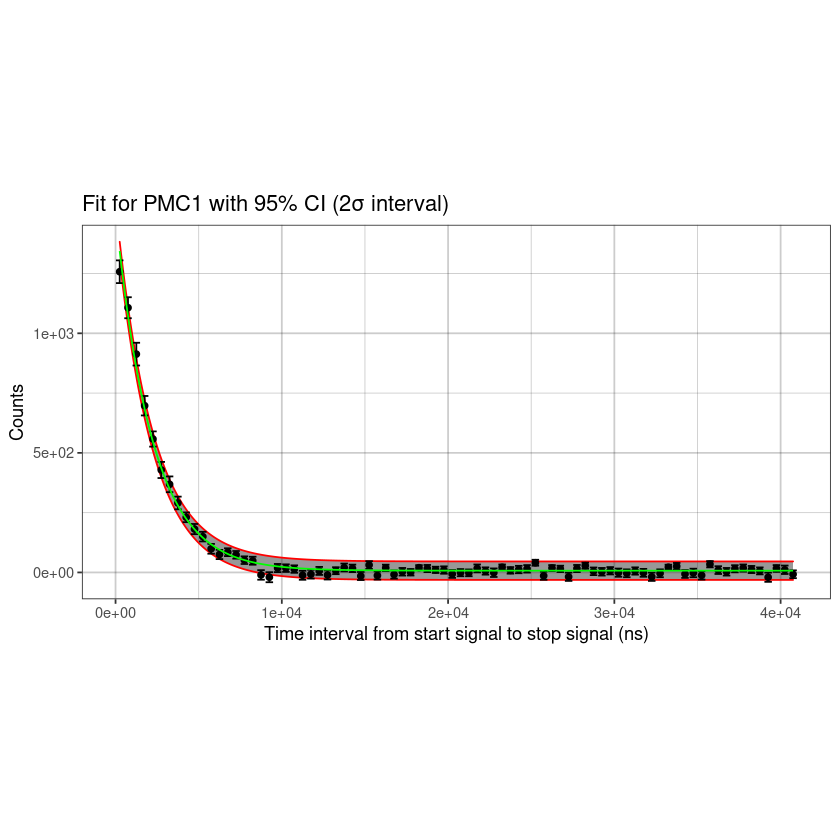

Saving 6.67 x 6.67 in image

Warning message:
“Removed 66 rows containing missing values (geom_point).”
Warning message:
“Removed 32750 row(s) containing missing values (geom_path).”


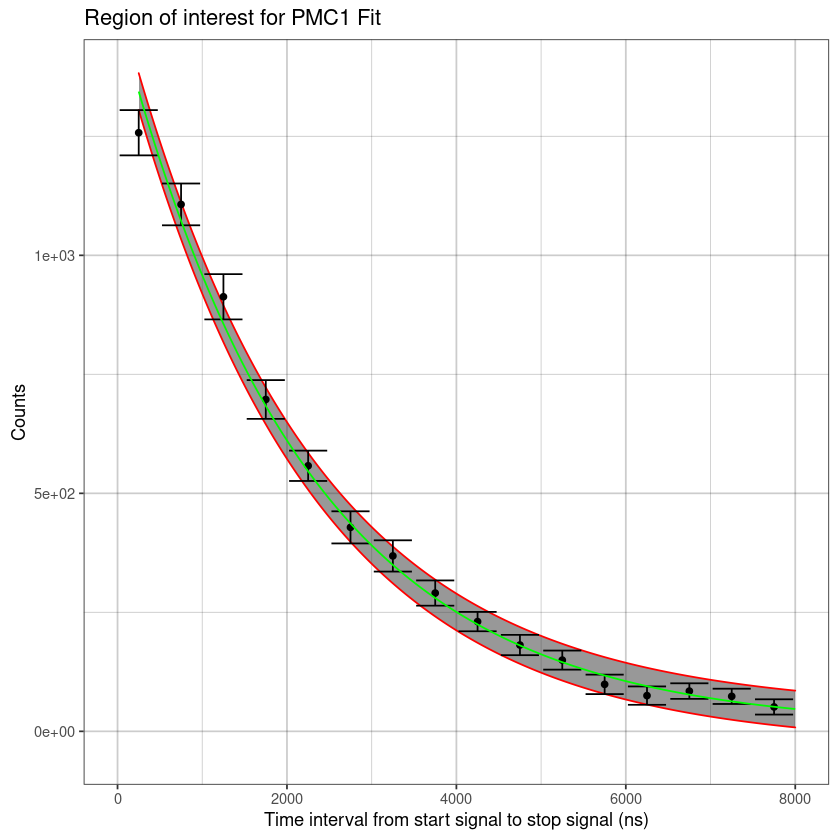

In [223]:
#xpl <- seq(0,4000)
xpl <- seq(min(odfa$x), max(odfa$x))
feo <- stderfSSasymp(ofit, xpl)

draw_with_errors <- function(pts, xpl, fe) {
    fp <- ggplot(pts)
    fp <- fp + geom_ribbon(data=fe, aes(x=xpl, ymin = yl, ymax=yh), col='red', alpha=0.5)
    fp <- fp + geom_point(aes(x=x, y=y))
    fp <- fp + geom_errorbar(aes(x=x, y=y, ymin= y-ysd, ymax=y + ysd))
    fp <- fp + geom_line(data=fe, aes(x=x, y=y), col='green')
    fp <- fp + scale_x_continuous(labels=scales::scientific) + scale_y_continuous(labels=scales::scientific)
    fp <- fp + theme_bw() + theme(aspect.ratio = 0.5, panel.grid = element_line(color=rgb(0,0,0,0.2)))
    fp <- fp + labs(x="Time interval from start signal to stop signal (ns)", y="Counts")
    return(fp)
}
#ofe <- erfSSasymp(ofit,xpl)
#ofp <- ggplot() 
#ofp <- ofp + geom_ribbon(aes(x=xpl, ymin = ofe$yl, ymax=ofe$yh), col='red', alpha=0.5)
#ofp <- ofp + geom_point(aes(x=odfa$x, y=odfa$y))
#ofp <- ofp + geom_errorbar(aes(x=odfa$x, y=odfa$y, ymin = odfa$y-sqrt(odfa$y), ymax=odfa$y+sqrt(odfa$y)))
ofp <- draw_with_errors(odfa,xpl,feo)
ofp <- ofp 
#ofp <- ofp + scale_y_continuous(trans='log', limits=c(30,max(feo$yh)))
ofp + labs(title="Fit for PMC1 with 95% CI (2σ interval)")
ggsave("ofp_full.pdf",width=10,height=5,device=cairo_pdf)
ofp + xlim(0,8000) + labs(title="Region of interest for PMC1 Fit") + theme(aspect.ratio = 1)
ggsave("ofp_roi.pdf")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
“Removed 66 rows containing missing values (geom_point).”
Warning message:
“Removed 32750 row(s) containing missing values (geom_path).”


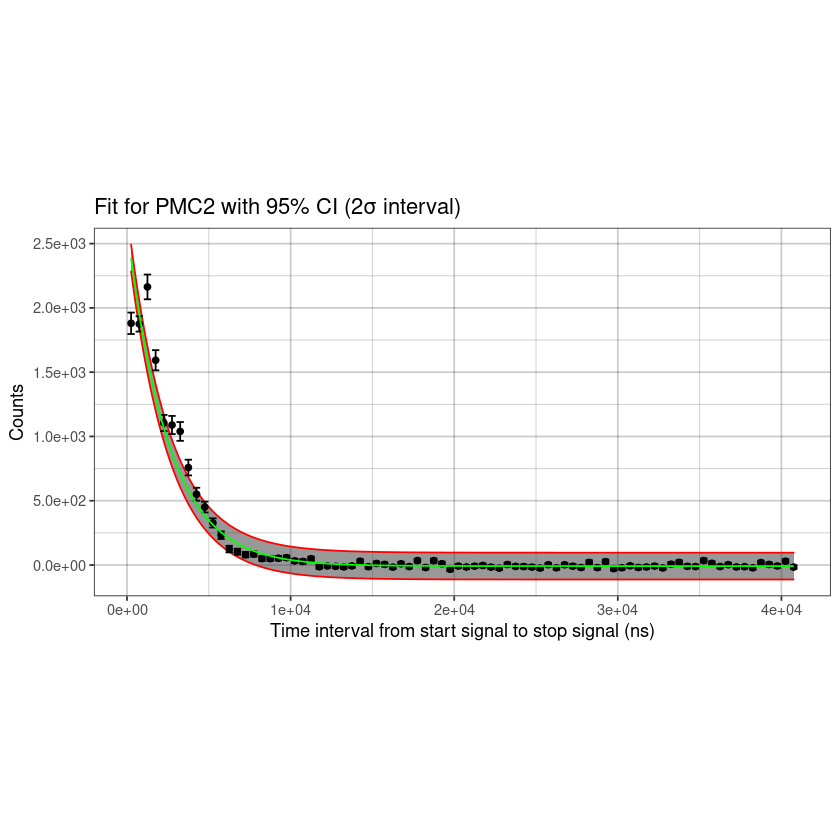

Saving 6.67 x 6.67 in image

Warning message:
“Removed 66 rows containing missing values (geom_point).”
Warning message:
“Removed 32750 row(s) containing missing values (geom_path).”


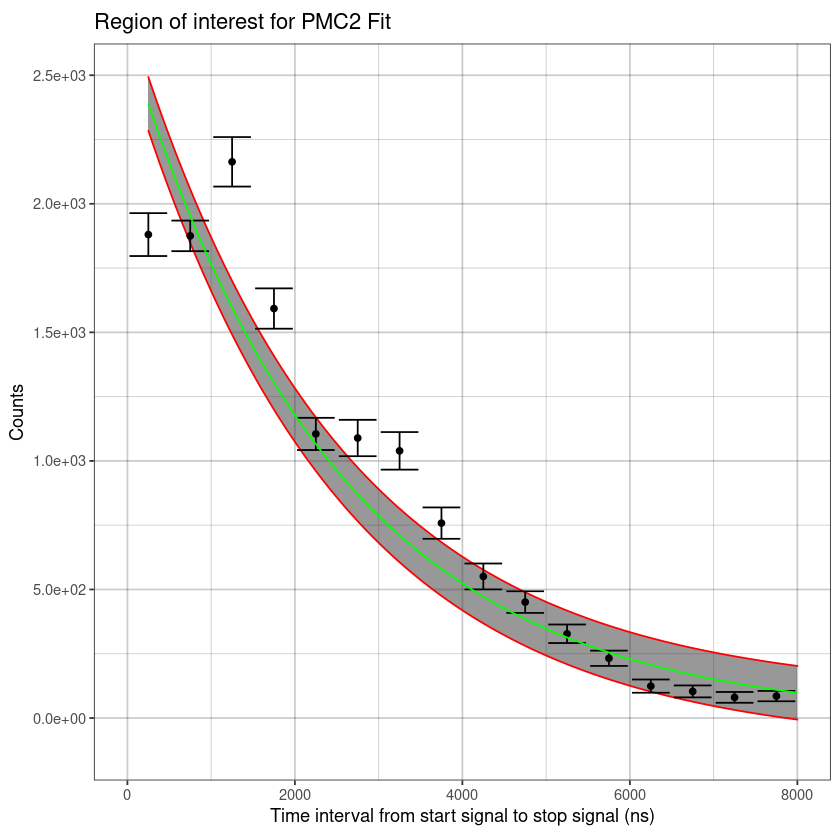

In [224]:
fen <- stderfSSasymp(nfit, xpl)
nfp <- draw_with_errors(ndfa, xpl, fen)
nfp + labs(title="Fit for PMC2 with 95% CI (2σ interval)")
ggsave("nfp_full.pdf",width=10,height=5,device=cairo_pdf)
nfp + xlim(0,8000) + labs(title="Region of interest for PMC2 Fit") + theme(aspect.ratio = 1)
ggsave("nfp_roi.pdf", device=cairo_pdf)
#ugh, that data is uglyyy

In [192]:
#chisq analysis of error.
fchisq <- function(dat,sds,pred) sum(((dat-pred)/sds)**2)

In [204]:
nfcs <- fchisq(ndfa$y, ndfa$ysd, predict(nfit,ndfa))
ofcs <- fchisq(odfa$y, odfa$ysd, predict(ofit,odfa))
c(nfcs,ofcs)
#fit has 3 dof, dataset has nrow points so
pchisq(df=nrow(odfa)-length(coef(ofit)),ofcs,lower.tail = FALSE)
nrow(odfa)-length(coef(ofit))
pchisq(df=nrow(ndfa)-length(coef(nfit)),nfcs,lower.tail = FALSE)

[1] 243.72485  72.69908

[1] 0.6778977

[1] 79

[1] 1.075789e-18

In [634]:
predict(nfit,ndfa[0:10,])

[1] 2388.6887 1952.5677 1595.7971 1303.9394 1065.1839  869.8690  710.0909
 [8]  579.3836  472.4580  384.9871
attr(,"gradient")
              yf        y0 log_alpha
 [1,] 0.09553649 0.9044635 -240.6891
 [2,] 0.26009980 0.7399002 -590.6901
 [3,] 0.39472151 0.6052785 -805.3610
 [4,] 0.50484937 0.4951506 -922.3605
 [5,] 0.59493993 0.4050601 -970.1240
 [6,] 0.66863889 0.3313611 -969.9728
 [7,] 0.72892864 0.2710714 -937.7613
 [8,] 0.77824893 0.2217511 -885.1611
 [9,] 0.81859560 0.1814044 -820.6577
[10,] 0.85160136 0.1483986 -750.3240

In [388]:
?pchisq

In [391]:
length(coef(ofit))

[1] 3

In [631]:
odfa$ysd

[1] 47.56825 43.92519 47.54820 40.70208 31.85577 33.71535 32.81349 26.48983
 [9] 20.33018 21.34184 20.02335 20.45857 19.28766 16.34980 16.00988 16.02672
[17] 16.65518 20.01777 20.89953 17.10188 15.69698 15.56904 18.80511 18.30554
[25] 16.74736 18.83168 14.58957 16.49044 15.66509 16.79326 16.10575 16.85271
[33] 13.37074 16.97097 15.93533 13.53943 10.54315 14.89482 13.06815 15.44005
[41] 16.35464 15.07963 14.27780 16.36871 15.30997 17.84806 11.64893 13.83171
[49] 15.50468 15.60113 12.43775 16.82301 12.45942 13.22031 17.36529 14.89482
[57] 12.85446 15.99796 15.93533 15.34259 17.20505 16.44610 15.30997 16.50679
[65] 17.36529 16.44610 10.63758 13.62999 16.35464 17.82002 17.53719 13.08576
[73] 16.15347 15.93533 14.86121 14.96181 14.75993 14.55526 19.18780 14.11794
[81] 17.55032 16.32404

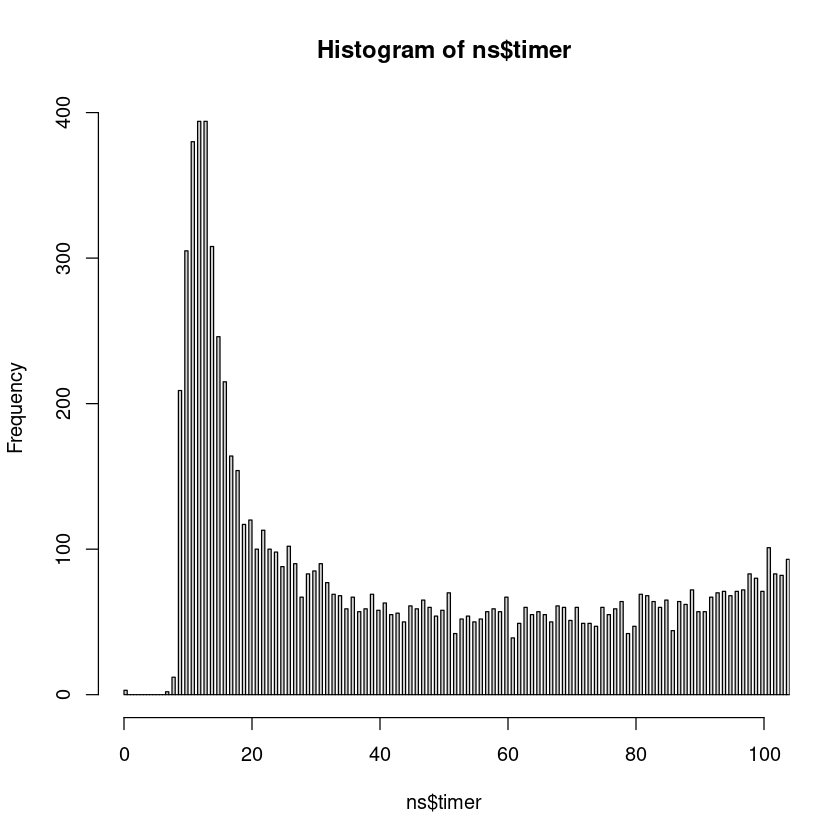

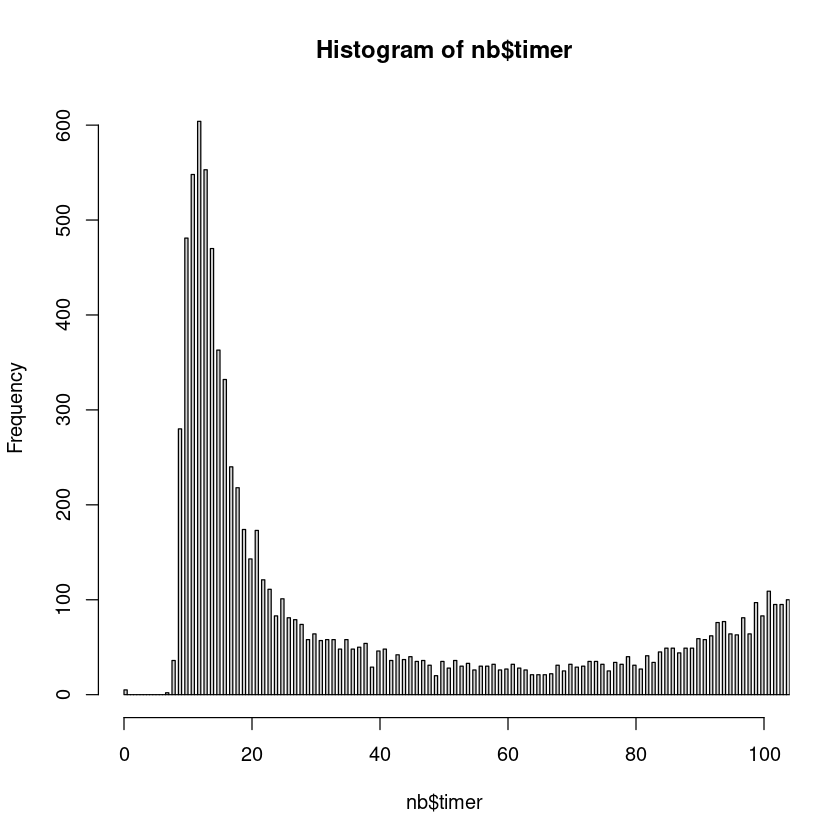

In [275]:
hist(ns$timer,breaks=10000,xlim = c(0,100))
hist(nb$timer,breaks=10000,xlim = c(0,100))